# Analyse descriptive du dataset
---

- Justification lignes supprimées
- Top 20 mots
- description nombre de mot, nombre de token
- Nombre de classes moyenne
- Distribution des classes
---

## Import data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # Barre de progression pour Jupyter
pd.set_option('display.max_colwidth', None)
import s3fs
from IPython.display import display, Markdown


In [2]:
if os.path.exists("data/df_target_V2.pkl"):
    df = pd.read_pickle('data/df_target_V2.pkl')

if os.path.exists("data/df_metadata"):
    df_metadata = pd.read_parquet('data/df_metadata')

In [3]:
import os
import s3fs
os.environ["AWS_ACCESS_KEY_ID"] = 'PG1XLIX2BY3P3BRECRJQ'
os.environ["AWS_SECRET_ACCESS_KEY"] = '+Mf8EF6sSat8xMorwl1BZLZZBF+Hcj2UHJ4DRZrs'
os.environ["AWS_SESSION_TOKEN"] = 'eyJhbGciOiJIUzUxMiIsInR5cCI6IkpXVCJ9.eyJhY2Nlc3NLZXkiOiJQRzFYTElYMkJZM1AzQlJFQ1JKUSIsImFsbG93ZWQtb3JpZ2lucyI6WyIqIl0sImF1ZCI6WyJtaW5pby1kYXRhbm9kZSIsIm9ueXhpYSIsImFjY291bnQiXSwiYXV0aF90aW1lIjoxNzQzMDcwMzAzLCJhenAiOiJvbnl4aWEiLCJlbWFpbCI6InF1ZW50aW4ubWFycmV0QGVuc2FlLmZyIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImV4cCI6MTc0NDYyMzI1NCwiZmFtaWx5X25hbWUiOiJNYXJyZXQiLCJnaXZlbl9uYW1lIjoiUXVlbnRpbiIsImdyb3VwcyI6WyJVU0VSX09OWVhJQSJdLCJpYXQiOjE3NDQwMTg0NTQsImlzcyI6Imh0dHBzOi8vYXV0aC5sYWIuc3NwY2xvdWQuZnIvYXV0aC9yZWFsbXMvc3NwY2xvdWQiLCJqdGkiOiIzMTQ4NDAyMi1jMTNmLTQ5MGEtYjU4My0yMmQ2MzQ5YTk0MDkiLCJsb2NhbGUiOiJmciIsIm5hbWUiOiJRdWVudGluIE1hcnJldCIsInBvbGljeSI6InN0c29ubHkiLCJwcmVmZXJyZWRfdXNlcm5hbWUiOiJxdWVudGluMTk5OSIsInJlYWxtX2FjY2VzcyI6eyJyb2xlcyI6WyJvZmZsaW5lX2FjY2VzcyIsInVtYV9hdXRob3JpemF0aW9uIiwiZGVmYXVsdC1yb2xlcy1zc3BjbG91ZCJdfSwicmVzb3VyY2VfYWNjZXNzIjp7ImFjY291bnQiOnsicm9sZXMiOlsibWFuYWdlLWFjY291bnQiLCJtYW5hZ2UtYWNjb3VudC1saW5rcyIsInZpZXctcHJvZmlsZSJdfX0sInJvbGVzIjpbIm9mZmxpbmVfYWNjZXNzIiwidW1hX2F1dGhvcml6YXRpb24iLCJkZWZhdWx0LXJvbGVzLXNzcGNsb3VkIl0sInNjb3BlIjoib3BlbmlkIHByb2ZpbGUgZ3JvdXBzIGVtYWlsIiwic2lkIjoiZjMwM2Q3OTYtYTM3My00MTk4LWFmZDktNWUyOTRjMWJkZTliIiwic3ViIjoiOGM1NjkxMjYtMGI2Mi00MGI0LTg4ZDAtMWFhYzgyMTJiOGE5IiwidHlwIjoiQmVhcmVyIn0.cO3MC8ZtjXLoAuYJzNi1BvPaTGQWRyMkyHT3Aakd8S6e0PvkeArmoRyzbeKOyb-amkhwkL5JNfxHsIl_t9aESw'
os.environ["AWS_DEFAULT_REGION"] = 'us-east-1'
fs = s3fs.S3FileSystem(
    client_kwargs={'endpoint_url': 'https://'+'minio.lab.sspcloud.fr'},
    key = os.environ["AWS_ACCESS_KEY_ID"], 
    secret = os.environ["AWS_SECRET_ACCESS_KEY"], 
    token = os.environ["AWS_SESSION_TOKEN"])

In [4]:
print(repr(os.getenv("AWS_ACCESS_KEY_ID")))
print(repr(os.getenv("AWS_SECRET_ACCESS_KEY")))

'PG1XLIX2BY3P3BRECRJQ'
'+Mf8EF6sSat8xMorwl1BZLZZBF+Hcj2UHJ4DRZrs'


raise RuntimeError("⛔ Cette cellule ne doit pas être exécutée.")

#Create filesystem object
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})

BUCKET_OUT = "s3://quentin1999/Data_Projet_NLP"
FILE_KEY_OUT_S3 = "df_final"
FILE_PATH_OUT_S3 = BUCKET_OUT + "/" + FILE_KEY_OUT_S3

with fs.open(FILE_PATH_OUT_S3, 'w') as file_out:
    df.to_csv(file_out)

In [5]:
fs.ls("s3://quentin1999/Data_Projet_NLP")

['quentin1999/Data_Projet_NLP/.keep',
 'quentin1999/Data_Projet_NLP/df_final',
 'quentin1999/Data_Projet_NLP/df_metadata',
 'quentin1999/Data_Projet_NLP/df_target_V2',
 'quentin1999/Data_Projet_NLP/df_target_V2.pkl',
 'quentin1999/Data_Projet_NLP/df_target_V3.pkl',
 'quentin1999/Data_Projet_NLP/full_df',
 'quentin1999/Data_Projet_NLP/mon_modele_final.zip']

In [6]:
if not os.path.exists("data/df_target_V2.pkl"):
    BUCKET = "s3://quentin1999/Data_Projet_NLP"
    FILE_KEY_S3 = "df_target_V2.pkl"
    FILE_PATH_S3 = BUCKET + "/" + FILE_KEY_S3

    with fs.open(FILE_PATH_S3, mode="rb") as file_in:
        df = pd.read_pickle(file_in)

    print("✅ Fichier chargé avec succès, shape :", df.shape)

    df.to_pickle("data/df_target_V2.pkl")

    print("✅ Fichier sauvegardé avec succès dans le dossier data")

## Selection des cas cliniques

In [7]:
df.shape

(10718, 12)

In [8]:
# On convertit chaque élément en array bool explicite
target_array = np.vstack(df['target'].apply(lambda x: np.array(x, dtype=bool)))

In [9]:
MeSH_vides = df[df['target'].apply(lambda x: not any(x))]
print("nombre cas sans code MeSH catégorie 'disease' :", MeSH_vides.shape[0])

df = df.drop(MeSH_vides.index)

nombre cas sans code MeSH catégorie 'disease' : 667


In [10]:
keys = [f"C{str(i).zfill(2)}" for i in range(1, 27)]
values = target_array.sum(axis=0)
result = dict(zip(keys, values))

cas_par_classes = pd.DataFrame.from_dict(result, orient='index', columns=['nombre_cas'])
cas_par_classes

,nombre_cas
C01,2343
C02,0
C03,0
C04,2998
C05,1008
C06,1519
C07,392
C08,1567
C09,261
C10,2136


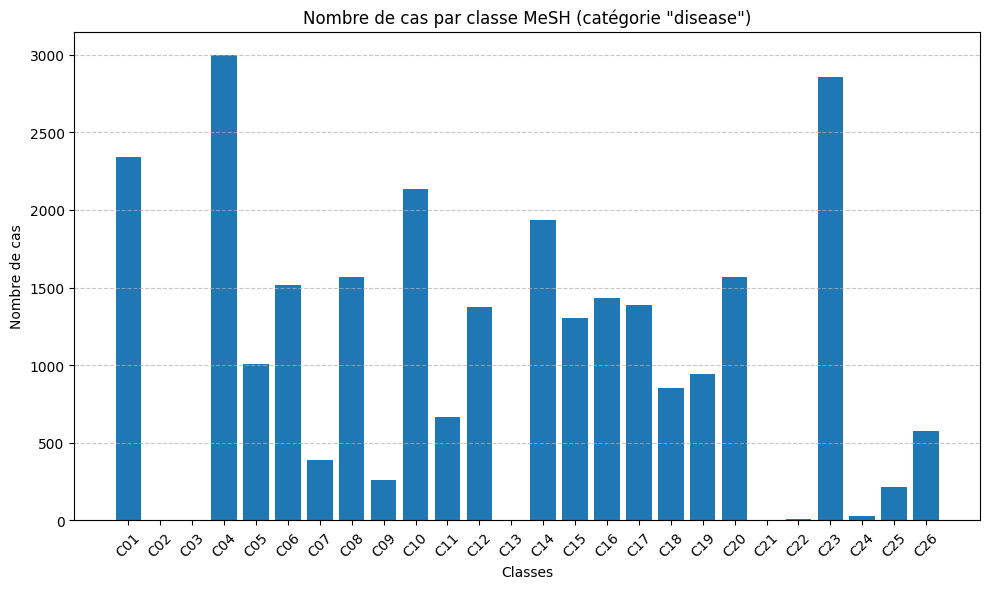

In [11]:
# Tracer un barplot
plt.figure(figsize=(10, 6))
plt.bar(cas_par_classes.index, cas_par_classes['nombre_cas'])
plt.xlabel('Classes')
plt.ylabel('Nombre de cas')
plt.title('Nombre de cas par classe MeSH (catégorie "disease")')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [12]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [13]:
# Convertir en int
arr_int = target_array.astype(int)

# 2. Calculer la matrice de corrélation
correlation_matrix = np.corrcoef(arr_int, rowvar=False)

# 3. Masquer le triangle inférieur
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))
correlation_matrix_masked = np.where(mask, np.nan, correlation_matrix)

# 4. Mettre dans un DataFrame
correlation_df = pd.DataFrame(correlation_matrix_masked)

# 5. Fonction de formatage
def highlight_corr(val):
    if np.isnan(val):
        return ""  # ne rien afficher pour les NaN
    val_rounded = f"{val:.2f}"
    if abs(val) > 0.10:
        return f"**{val_rounded}**"  # mettre en gras
    else:
        return val_rounded

# 6. Appliquer le formatage
formatted_corr_df = correlation_df.applymap(highlight_corr)

# 7. Afficher joliment en markdown
md_table = formatted_corr_df.to_markdown(index=False)
display(Markdown(md_table))

/opt/conda/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/tmp/ipykernel_12454/2624890895.py:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_corr_df = correlation_df.applymap(highlight_corr)


| 0   | 1   | 2   | 3         | 4     | 5        | 6        | 7        | 8        | 9         | 10       | 11    | 12   | 13        | 14       | 15        | 16    | 17       | 18       | 19       | 20   | 21    | 22        | 23    | 24    | 25        |
|:----|:----|:----|:----------|:------|:---------|:---------|:---------|:---------|:----------|:---------|:------|:-----|:----------|:---------|:----------|:------|:---------|:---------|:---------|:-----|:------|:----------|:------|:------|:----------|
|     |     |     | **-0.19** | -0.05 | -0.00    | -0.02    | **0.27** | 0.01     | -0.06     | -0.02    | 0.03  |      | -0.09     | -0.01    | **-0.14** | -0.00 | -0.09    | -0.09    | 0.05     |      | 0.05  | -0.02     | -0.01 | -0.01 | -0.08     |
|     |     |     |           |       |          |          |          |          |           |          |       |      |           |          |           |       |          |          |          |      |       |           |       |       |           |
|     |     |     |           |       |          |          |          |          |           |          |       |      |           |          |           |       |          |          |          |      |       |           |       |       |           |
|     |     |     |           | 0.00  | **0.15** | 0.06     | 0.01     | 0.04     | -0.05     | -0.06    | 0.07  |      | **-0.13** | **0.16** | **-0.12** | 0.03  | -0.08    | **0.17** | 0.08     |      | -0.02 | **-0.12** | -0.02 | -0.07 | **-0.11** |
|     |     |     |           |       | -0.08    | **0.12** | -0.05    | 0.03     | 0.06      | 0.01     | -0.05 |      | -0.06     | -0.04    | **0.12**  | 0.08  | 0.06     | 0.01     | 0.01     |      | -0.01 | -0.04     | -0.00 | -0.03 | 0.05      |
|     |     |     |           |       |          | -0.03    | -0.08    | -0.01    | **-0.15** | -0.09    | -0.04 |      | -0.10     | -0.02    | -0.02     | -0.06 | 0.01     | 0.03     | -0.04    |      | 0.03  | 0.07      | -0.01 | 0.00  | -0.03     |
|     |     |     |           |       |          |          | -0.03    | **0.18** | -0.02     | 0.09     | -0.03 |      | -0.02     | -0.02    | 0.03      | 0.10  | -0.03    | -0.05    | 0.02     |      | -0.00 | -0.02     | -0.00 | 0.05  | -0.03     |
|     |     |     |           |       |          |          |          | **0.14** | -0.09     | -0.06    | -0.07 |      | -0.02     | -0.01    | -0.06     | -0.05 | -0.06    | -0.04    | 0.01     |      | -0.01 | -0.02     | 0.06  | -0.02 | -0.04     |
|     |     |     |           |       |          |          |          |          | 0.07      | 0.01     | -0.03 |      | -0.01     | -0.01    | 0.01      | -0.01 | -0.02    | -0.02    | -0.02    |      | -0.00 | 0.05      | 0.00  | -0.02 | -0.01     |
|     |     |     |           |       |          |          |          |          |           | **0.12** | -0.09 |      | 0.03      | -0.08    | 0.09      | -0.06 | 0.06     | 0.03     | 0.02     |      | -0.00 | **0.13**  | -0.01 | -0.01 | 0.08      |
|     |     |     |           |       |          |          |          |          |           |          | -0.07 |      | -0.01     | -0.04    | 0.08      | 0.05  | -0.01    | -0.03    | 0.03     |      | 0.02  | 0.01      | 0.00  | -0.02 | -0.00     |
|     |     |     |           |       |          |          |          |          |           |          |       |      | -0.07     | -0.02    | -0.00     | -0.04 | 0.02     | **0.12** | 0.06     |      | -0.01 | 0.02      | -0.01 | -0.02 | -0.05     |
|     |     |     |           |       |          |          |          |          |           |          |       |      |           |          |           |       |          |          |          |      |       |           |       |       |           |
|     |     |     |           |       |          |          |          |          |           |          |       |      |           | 0.01     | **0.13**  | 0.01  | -0.04    | -0.05    | -0.01    |      | -0.01 | 0.10      | -0.01 | -0.02 | -0.01     |
|     |     |     |           |       |          |          |          |          |           |          |       |      |           |          | 0.02      | 0.05  | -0.04    | -0.05    | **0.41** |      | 0.01  | -0.01     | -0.01 | -0.01 | -0.06     |
|     |     |     |           |       |          |          |          |          |           |          |       |      |           |          |           | 0.03  | **0.20** | 0.04     | -0.05    |      | 0.00  | 0.00      | -0.02 | -0.05 | -0.05     |
|     |     |     |           |       |          |          |          |          |           |          |       |      |           |          |           |       | 0.02     | -0.06    | **0.21** |      | 0.00  | -0.07     | 0.01  | 0.08  | -0.06     |
|     |     |     |           |       |          |          |          |          |           |          |       |      |           |          |           |       |          | **0.24** | 0.02     |      | -0.01 | -0.01     | -0.01 | -0.01 | -0.04     |
|     |     |     |           |       |          |          |          |          |           |          |       |      |           |          |           |       |          |          | 0.03     |      | -0.01 | -0.07     | -0.00 | -0.03 | -0.05     |
|     |     |     |           |       |          |          |          |          |           |          |       |      |           |          |           |       |          |          |          |      | -0.00 | -0.06     | 0.03  | 0.02  | -0.08     |
|     |     |     |           |       |          |          |          |          |           |          |       |      |           |          |           |       |          |          |          |      |       |           |       |       |           |
|     |     |     |           |       |          |          |          |          |           |          |       |      |           |          |           |       |          |          |          |      |       | 0.00      | -0.00 | -0.00 | -0.01     |
|     |     |     |           |       |          |          |          |          |           |          |       |      |           |          |           |       |          |          |          |      |       |           | -0.01 | -0.01 | 0.02      |
|     |     |     |           |       |          |          |          |          |           |          |       |      |           |          |           |       |          |          |          |      |       |           |       | 0.02  | 0.00      |
|     |     |     |           |       |          |          |          |          |           |          |       |      |           |          |           |       |          |          |          |      |       |           |       |       | 0.00      |
|     |     |     |           |       |          |          |          |          |           |          |       |      |           |          |           |       |          |          |          |      |       |           |       |       |           |

In [20]:
# 7. Afficher dans Jupyter
# 6. Styler : arrondir + mettre en gras les grosses corrélations
def style_correlation(val):
    if pd.isna(val):
        return ""
    val = round(val, 2)
    if abs(val) > 0.10:
        return f"font-weight: bold"
    return ""

styled_corr = correlation_df.style.format(precision=2).map(style_correlation)

# 7. Afficher dans Jupyter
styled_corr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,nan,nan,nan,-0.19,-0.05,-0.00,-0.02,0.27,0.01,-0.06,-0.02,0.03,nan,-0.09,-0.01,-0.14,-0.00,-0.09,-0.09,0.05,nan,0.05,-0.02,-0.01,-0.01,-0.08
1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,nan,nan,nan,nan,0.00,0.15,0.06,0.01,0.04,-0.05,-0.06,0.07,nan,-0.13,0.16,-0.12,0.03,-0.08,0.17,0.08,nan,-0.02,-0.12,-0.02,-0.07,-0.11
4,nan,nan,nan,nan,nan,-0.08,0.12,-0.05,0.03,0.06,0.01,-0.05,nan,-0.06,-0.04,0.12,0.08,0.06,0.01,0.01,nan,-0.01,-0.04,-0.00,-0.03,0.05
5,nan,nan,nan,nan,nan,nan,-0.03,-0.08,-0.01,-0.15,-0.09,-0.04,nan,-0.10,-0.02,-0.02,-0.06,0.01,0.03,-0.04,nan,0.03,0.07,-0.01,0.00,-0.03
6,nan,nan,nan,nan,nan,nan,nan,-0.03,0.18,-0.02,0.09,-0.03,nan,-0.02,-0.02,0.03,0.10,-0.03,-0.05,0.02,nan,-0.00,-0.02,-0.00,0.05,-0.03
7,nan,nan,nan,nan,nan,nan,nan,nan,0.14,-0.09,-0.06,-0.07,nan,-0.02,-0.01,-0.06,-0.05,-0.06,-0.04,0.01,nan,-0.01,-0.02,0.06,-0.02,-0.04
8,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.07,0.01,-0.03,nan,-0.01,-0.01,0.01,-0.01,-0.02,-0.02,-0.02,nan,-0.00,0.05,0.00,-0.02,-0.01
9,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.12,-0.09,nan,0.03,-0.08,0.09,-0.06,0.06,0.03,0.02,nan,-0.00,0.13,-0.01,-0.01,0.08


In [26]:
import numpy as np
import pandas as pd

# Convertir en int
arr_int =  target_array.astype(int)

# Supprimer les colonnes constantes (écart-type nul)
#arr_int = arr_int[:, arr_int.std(axis=0) != 0]

# Calculer la corrélation
correlation_matrix = np.corrcoef(arr_int, rowvar=False)

# Masquer le triangle inférieur
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))
correlation_matrix = np.where(mask, np.nan, correlation_matrix)

# Créer un DataFrame
correlation_df = pd.DataFrame(correlation_matrix)

# Appliquer un style : format 2 chiffres, couleurs selon valeur
styled_corr = correlation_df.style \
    .format(precision=2, na_rep="") \
    .background_gradient(cmap='RdYlGn', vmin=-1, vmax=1) \
    .set_properties(**{'font-size': '10pt'}) \
    .set_caption("Matrice de corrélation (triangle supérieur seulement)")

# Afficher dans Jupyter
styled_corr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,,,,-0.19,-0.05,-0.00,-0.02,0.27,0.01,-0.06,-0.02,0.03,,-0.09,-0.01,-0.14,-0.00,-0.09,-0.09,0.05,,0.05,-0.02,-0.01,-0.01,-0.08
1,,,,,,,,,,,,,,,,,,,,,,,,,,
2,,,,,,,,,,,,,,,,,,,,,,,,,,
3,,,,,0.00,0.15,0.06,0.01,0.04,-0.05,-0.06,0.07,,-0.13,0.16,-0.12,0.03,-0.08,0.17,0.08,,-0.02,-0.12,-0.02,-0.07,-0.11
4,,,,,,-0.08,0.12,-0.05,0.03,0.06,0.01,-0.05,,-0.06,-0.04,0.12,0.08,0.06,0.01,0.01,,-0.01,-0.04,-0.00,-0.03,0.05
5,,,,,,,-0.03,-0.08,-0.01,-0.15,-0.09,-0.04,,-0.10,-0.02,-0.02,-0.06,0.01,0.03,-0.04,,0.03,0.07,-0.01,0.00,-0.03
6,,,,,,,,-0.03,0.18,-0.02,0.09,-0.03,,-0.02,-0.02,0.03,0.10,-0.03,-0.05,0.02,,-0.00,-0.02,-0.00,0.05,-0.03
7,,,,,,,,,0.14,-0.09,-0.06,-0.07,,-0.02,-0.01,-0.06,-0.05,-0.06,-0.04,0.01,,-0.01,-0.02,0.06,-0.02,-0.04
8,,,,,,,,,,0.07,0.01,-0.03,,-0.01,-0.01,0.01,-0.01,-0.02,-0.02,-0.02,,-0.00,0.05,0.00,-0.02,-0.01
9,,,,,,,,,,,0.12,-0.09,,0.03,-0.08,0.09,-0.06,0.06,0.03,0.02,,-0.00,0.13,-0.01,-0.01,0.08


## Afficher nuage de mot avec WordCloud

In [54]:
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')


#stop_words = set(stopwords.words('english'))
#text_brut = [word for word in text_brut if word not in stop_words]

[nltk_data] Downloading package stopwords to /home/onyxia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

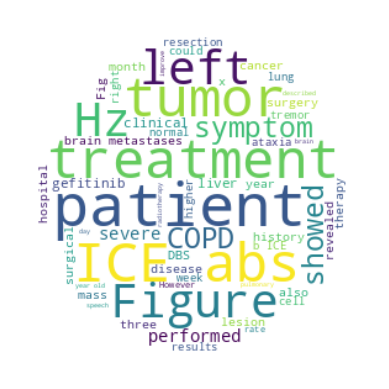

In [ ]:
from wordcloud import WordCloud
# Display one wordcloud for each of the most frequent classes

text_brut = " ".join(df['case_text'].astype(str))

STOPWORDS = set(stopwords.words('english'))

import matplotlib.pyplot as plt
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# plot a word cloud
text = str(df['case_text'])
wc = WordCloud(background_color="white", repeat=True, mask=mask, stopwords = STOPWORDS)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [56]:
# Ton texte brut, bien assemblé
text_brut = " ".join(df['case_text'].astype(str))

# Définir les stopwords
STOPWORDS = set(stopwords.words('english'))

# Nettoyer et découper en mots
words = re.findall(r'\b\w+\b', text_brut.lower())
words = [word for word in words if word not in STOPWORDS and len(word) > 2]

# Compte les occurrences des mots
term_counts = Counter(words)

# Prend les 20 mots les plus fréquents
most_common_terms = term_counts.most_common(20)

# Affiche proprement en texte
print("Top 20 des mots les plus fréquents :")
for term, count in most_common_terms:
    print(f"{term}: {count}")

Top 20 des mots les plus fréquents :
patient: 42208
showed: 21150
figure: 19926
normal: 17939
revealed: 16054
left: 15717
right: 15197
day: 14040
blood: 13655
examination: 12687
treatment: 11966
year: 11738
performed: 10850
old: 10724
fig: 10646
history: 10253
months: 10033
cells: 9616
days: 8983
also: 8185


In [39]:
import spacy
import scispacy
from scispacy.linking import EntityLinker
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load the Med7 model
nlp = spacy.load("en_core_sci_sm")

# Ajouter un linker vers UMLS (si tu veux mapper les entités à des concepts médicaux précis)
linker = EntityLinker(resolve_abbreviations=True, name="umls")
nlp.add_pipe("scispacy_linker", config={"resolve_abbreviations": True, "linker_name": "umls"})

/opt/conda/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.1.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.1.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [40]:
# Échantillon aléatoire de 250 lignes (modifiable)
sample_df = df.sample(n=250, random_state=42)
text = " ".join(sample_df['case_text'].astype(str))

# Applique le modèle NLP sur tout le texte d’un coup (plus rapide et propre)
doc = nlp(text)

# Récupère les entités détectées
medical_terms = [ent.lemma_.lower() for ent in doc.ents]

# Ajoute des mots personnalisés si besoin
additional_terms = ["one", "two", "three", "day", "daily", "month"]
medical_terms.extend(additional_terms)

In [41]:
from collections import Counter

# Compte les occurrences des termes médicaux
term_counts = Counter(medical_terms)

# Affiche les 20 termes les plus fréquents
most_common_terms = term_counts.most_common(20)

# Affichage propre
print("Top 20 des termes médicaux les plus fréquents :")
for term, count in most_common_terms:
    print(f"{term}: {count}")

Top 20 des termes médicaux les plus fréquents :
patient: 936
day: 370
month: 287
increase: 200
treatment: 197
week: 190
year: 186
level: 180
negative: 179
diagnosis: 154
figure: 147
diagnose: 132
admission: 125
lesion: 125
patient's: 122
finding: 117
case: 115
positive: 114
hospital: 103
decrease: 102


['male', 'admit', 'department of surgery', 'clinical emergency hospital', 'bucharest', 'height', 'meter', 'multiple trauma', 'haemoperitoneum', 'splenic rupture', 'blunt bladder injury', 'microscopic', 'hematuria', 'mild cerebral contusion', 'retrograde', 'amnesia', 'facial abrasion', 'blunt ch trauma', 'blunt right knee injury', 'medical history', 'hepatitis c virus infection', 'admission', 'gcs=15', 'retrograde', 'amnesia', 'bp=122/70 mmhg', 'hr=75/min', 'sinus rhythm', 'rr=14/min', 'abdoman', 'soft', 'no rebound', 'guarding', 'tender', 'left upper quadrant', 'epigastrium', 'abdominal ultrasound', 'perisplenic fluid', 'hypoechoic splenic area', 'contrast ct', 'splenic laceration', 'spleen', 'upper pole', 'capsule disruption', 'splenic pedicle', 'perihepatic', 'perisplenic', 'blood', 'pelvis', 'presence', 'grade iv splenic injury', 'aast-ois', 'moderate', 'haemoperitoneum', 'performance', 'splenic angiography', 'heterogeneous', 'contrast', 'splenic parenchyma', 'contrast extravasation

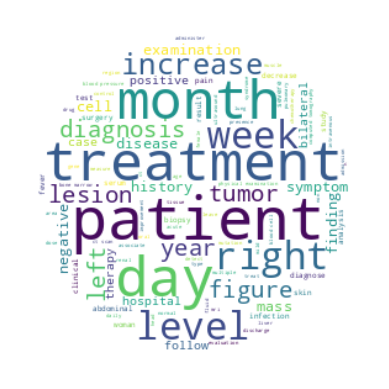

In [57]:
# Génère le nuage de mots
medical_bagofwords = " ".join(medical_terms)
print(medical_terms)

wc = WordCloud(background_color="white", repeat=True, mask=mask, stopwords=STOPWORDS)
wc.generate(medical_bagofwords)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()